In [9]:
import pandas as pd
import yfinance as yf
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import ast
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
#replace with scraping code
df = pd.read_json('/home/hashim/stock_project_eynvision-/data/data.json')
df

,symbol,name,market_cap,sector,industry
0,BA,The Boeing Company,$110.46 B,Industrials,Aerospace & Defense
1,GS,"The Goldman Sachs Group, Inc.",$112.71 B,Financials,Capital Markets
2,IBM,International Business Machines Corporation,$119.20 B,Technology,Information Technology Services
3,CAT,Caterpillar Inc.,$124.13 B,Industrials,Farm & Heavy Construction Machinery
4,HON,Honeywell International Inc.,$136.48 B,Industrials,Specialty Industrial Machinery
5,AMGN,Amgen Inc.,$141.72 B,Healthcare,Drug Manufacturers—General
6,AXP,American Express Company,$150.76 B,Financials,Credit Services
7,MCD,McDonald's Corporation,$186.57 B,Consumer Discretionary,Restaurants
8,CRM,"salesforce.com, inc.",$193.80 B,Technology,Software—Application
9,MSFT,Microsoft Corporation,$2.328 T,Technology,Software—Infrastructure


In [3]:
tickers = df['symbol'].tolist()  

start_date = '2010-01-01'
end_date = '2022-12-31'

stock_data = {}

for ticker in tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if len(data) > 0:
            stock_data[ticker] = data['Adj Close']  # Use adjusted close prices
    except Exception as e:
        print(f"Could not fetch data for {ticker}: {e}")

stock_df = pd.DataFrame(stock_data)

stock_df.dropna(axis=1, thresh=len(stock_df) * 0.9, inplace=True)  # Keep tickers with 90%+ data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
import pandas as pd


symbols_in_df = df['symbol'].tolist()

columns_in_stock_df = stock_df.columns.tolist()

missing_symbol = set(symbols_in_df) - set(columns_in_stock_df)
if missing_symbol:
    missing_symbol = missing_symbol.pop()
    print("removed symbol:", missing_symbol)

    df = df[df['symbol'] != missing_symbol]

# We have removed the missing symbol from the df. This will be useful later on. 

removed symbol: DOW


In [5]:
stock_df

,BA,GS,IBM,CAT,HON,AMGN,AXP,MCD,CRM,MSFT,...,HD,PG,WBA,JPM,WMT,TRV,JNJ,V,UNH,MMM
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,43.777554,133.968063,75.353783,40.027206,27.867006,40.915897,32.906181,41.753372,18.622328,23.347322,...,20.165380,39.663853,23.392056,29.156567,13.113418,35.008781,41.989922,19.822807,25.299860,44.016720
2010-01-05,45.211338,136.336624,74.443520,40.505753,27.922264,40.561455,32.833797,41.434132,18.542683,23.354862,...,20.313087,39.676842,23.203917,29.721319,12.982836,34.179417,41.503025,19.595661,25.259743,43.741035
2010-01-06,46.582798,134.881409,73.959938,40.628815,27.922264,40.256641,33.364544,40.868828,18.510324,23.211533,...,20.242750,39.488640,23.028326,29.884624,12.953822,33.694462,41.840595,19.332520,25.508488,44.361359
2010-01-07,48.468559,137.520828,73.703926,40.792885,28.460951,39.888035,33.905678,41.168098,18.428192,22.970142,...,20.481894,39.274494,23.166290,30.476603,12.961076,34.179417,41.541992,19.512440,26.487429,44.393181
2010-01-08,48.001011,134.920120,74.443520,41.250916,29.089445,40.242466,33.881454,41.128193,18.455570,23.128555,...,20.383421,39.222561,23.197653,30.401741,12.895783,34.130226,41.684803,19.566427,26.238684,44.705975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,189.059998,328.595123,131.266068,232.178604,205.883209,249.577682,143.163055,256.992523,128.867920,235.345581,...,304.280914,146.079834,34.324608,124.506882,46.747604,182.684647,168.306671,203.044586,517.337402,92.038422
2022-12-27,189.399994,325.228363,131.979630,235.343735,206.865112,249.076462,142.549576,256.291321,130.082535,233.600677,...,305.063721,147.352859,34.040272,124.943169,46.760616,183.648788,168.259262,203.498367,517.999512,92.099701
2022-12-28,188.380005,324.182251,129.755569,231.704330,204.265930,247.213501,140.232040,254.629684,127.902206,231.205109,...,301.416962,145.448135,33.391632,125.626007,45.941223,181.383072,167.529053,202.215958,514.552612,90.621132


In [6]:
# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

# Function to calculate Sharpe ratio (maximize this)
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_returns, p_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_volatility

# Function to calculate the Global Minimum Variance portfolio
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

# Function to optimize portfolios
def optimize_portfolios(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    # GMV Portfolio
    gmvol_result = minimize(minimize_volatility, num_assets*[1./num_assets], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    
    # Max Sharpe Portfolio
    max_sharpe_result = minimize(neg_sharpe_ratio, num_assets*[1./num_assets], args=args, method='SLSQP', bounds=bounds, constraints=constraints)

    return gmvol_result.x, max_sharpe_result.x

In [7]:
returns = stock_df.pct_change().dropna()

# Perform analysis for each 3-year window
window_size = 3 * 252  # Approximate trading days in 3 years
window_results = {}

for start in range(0, len(returns) - window_size, 252):  # Step by 1 year (252 trading days)
    window_returns = returns.iloc[start:start + window_size]
    
    mean_returns = window_returns.mean()
    cov_matrix = window_returns.cov()

    gmvol_weights, max_sharpe_weights = optimize_portfolios(mean_returns, cov_matrix)
    
    year_range = f"{returns.index[start].year}-{returns.index[start + window_size - 1].year}"
    window_results[year_range] = {
        'GMV Weights': gmvol_weights,
        'Max Sharpe Weights': max_sharpe_weights
    }

window_results_df = pd.DataFrame(window_results).T

window_results_df

,GMV Weights,Max Sharpe Weights
2010-2013,"[3.4833721586658396e-18, 6.399761933306302e-18...","[1.540291862321362e-16, 0.0, 3.146057624839939..."
2011-2014,"[0.0, 6.867373488347768e-18, 0.031464847320895...","[6.132800802938652e-17, 0.0, 5.333187995142382..."
2012-2015,"[0.00637067692561665, 0.0, 0.05577919776495732...","[0.0, 0.0, 4.3266474019942906e-17, 1.788738634..."
2013-2016,"[0.0, 5.702740785810043e-19, 0.035111028765540...","[0.0, 8.152221032064763e-15, 0.0, 0.0, 0.0, 0...."
2014-2017,"[1.4495852813183284e-18, 5.214774236981017e-18...","[0.0, 7.91033905045424e-16, 0.0, 0.0, 0.0, 4.4..."
2015-2018,"[2.2549104376062886e-18, 0.0, 0.0, 0.0, 0.0, 0...","[3.0560024576724492e-15, 3.547162563677375e-14..."
2016-2019,"[2.14987067115068e-18, 2.3460423542290404e-18,...","[0.0, 4.0997230160561654e-16, 0.0, 0.0, 0.0, 2..."
2017-2020,"[4.743384504624082e-19, 2.981555974335137e-19,...","[6.549590654637406e-16, 0.0, 0.0, 0.9999999999..."
2018-2021,"[8.57671285056529e-18, 0.0, 0.0, 1.86740053155...","[1.0, 0.0, 3.122502256758253e-17, 0.0, 1.83880..."
2019-2022,"[2.4159754688638817e-19, 1.4745305711797562e-1...","[1.0, 0.0, 1.457167719820518e-16, 0.0, 0.0, 0...."


In [8]:
window_results_df['GMV Weights'] = window_results_df['GMV Weights'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
window_results_df['Max Sharpe Weights'] = window_results_df['Max Sharpe Weights'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

gmv_weights = np.array(window_results_df['GMV Weights'].tolist())
sharpe_weights = np.array(window_results_df['Max Sharpe Weights'].tolist())

# Stock symbols from our original stock data (just the tickers, not other columns like 'name', 'market_cap')
symbols = df['symbol'].tolist()  

gmv_df = pd.DataFrame(gmv_weights, columns=symbols, index=window_results_df.index)
sharpe_df = pd.DataFrame(sharpe_weights, columns=symbols, index=window_results_df.index)

gmv_df, sharpe_df

(                     BA            GS           IBM           CAT  \
 2010-2013  3.483372e-18  6.399762e-18  0.000000e+00  1.467539e-17   
 2011-2014  0.000000e+00  6.867373e-18  3.146485e-02  4.690467e-18   
 2012-2015  6.370677e-03  0.000000e+00  5.577920e-02  3.523657e-18   
 2013-2016  0.000000e+00  5.702741e-19  3.511103e-02  2.691915e-02   
 2014-2017  1.449585e-18  5.214774e-18  8.222737e-03  3.776372e-03   
 2015-2018  2.254910e-18  0.000000e+00  0.000000e+00  0.000000e+00   
 2016-2019  2.149871e-18  2.346042e-18  2.073388e-02  2.100640e-18   
 2017-2020  4.743385e-19  2.981556e-19  2.031225e-03  9.859464e-19   
 2018-2021  8.576713e-18  0.000000e+00  0.000000e+00  1.867401e-18   
 2019-2022  2.415975e-19  1.474531e-18  2.212771e-18  0.000000e+00   
 
                     HON          AMGN           AXP       MCD           CRM  \
 2010-2013  1.028213e-17  9.260009e-18  1.532822e-17  0.193411  1.255499e-17   
 2011-2014  2.171853e-18  1.688330e-18  0.000000e+00  0.211275  0.00

<Figure size 1400x800 with 0 Axes>

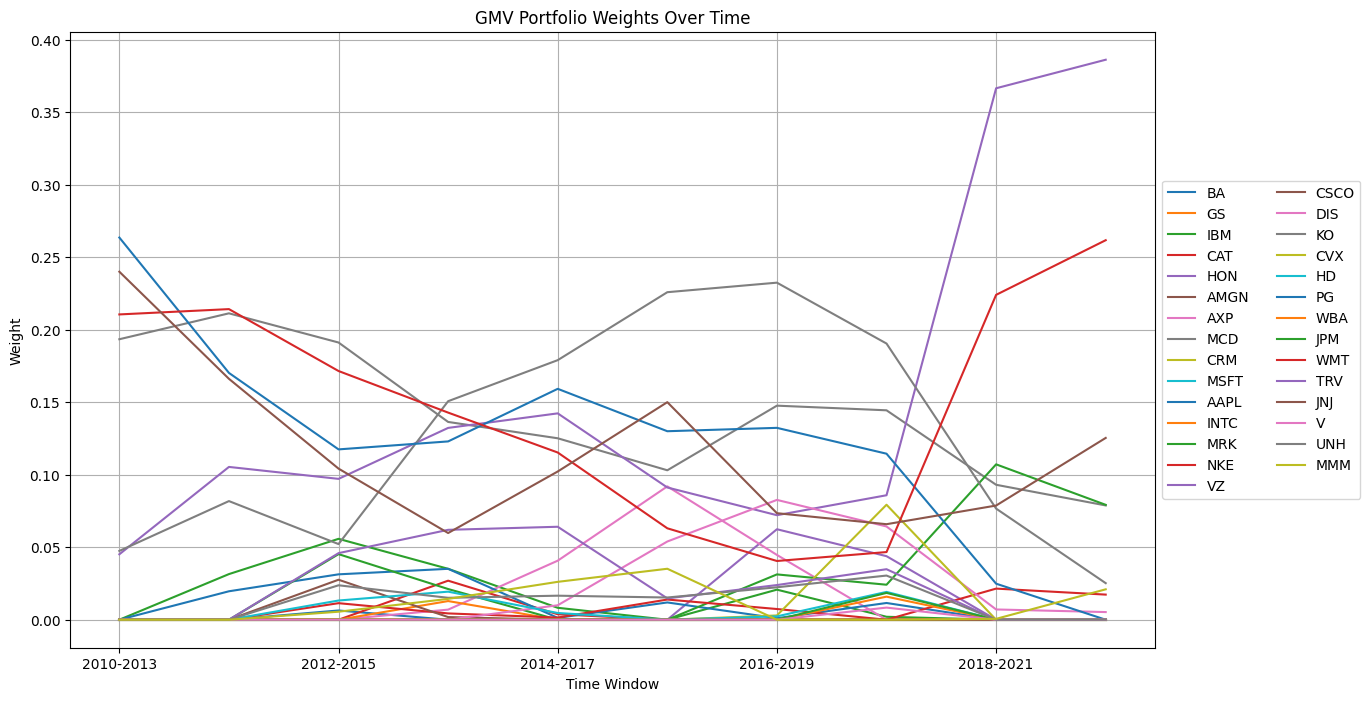

<Figure size 1400x800 with 0 Axes>

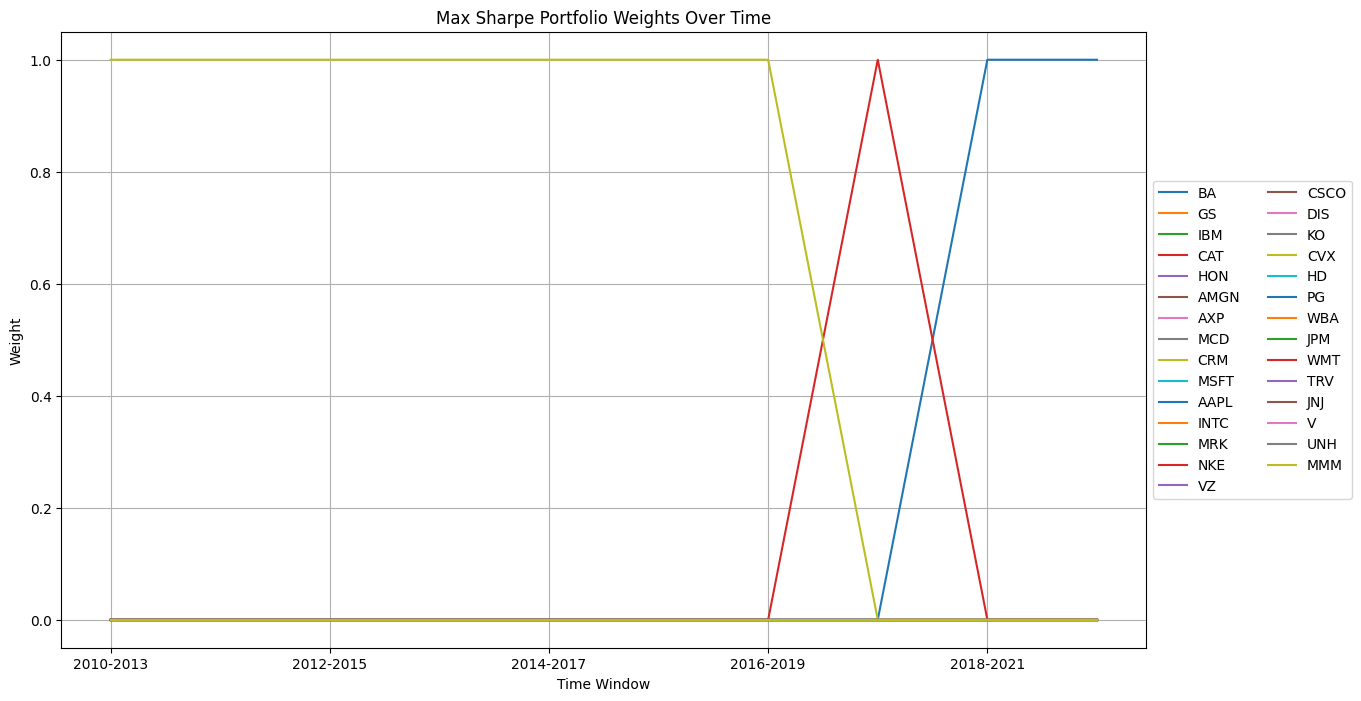

In [10]:
# Plot GMV Portfolio Weights
plt.figure(figsize=(14, 8))
gmv_df.plot(kind='line', title='GMV Portfolio Weights Over Time', figsize=(14,8))
plt.ylabel('Weight')
plt.xlabel('Time Window')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=2)
plt.grid(True)
plt.show()

# Plot Max Sharpe Portfolio Weights
plt.figure(figsize=(14, 8))
sharpe_df.plot(kind='line', title='Max Sharpe Portfolio Weights Over Time', figsize=(14,8))
plt.ylabel('Weight')
plt.xlabel('Time Window')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=2)
plt.grid(True)
plt.show()


In [11]:
gmv_avg_weights = gmv_df.mean()
sharpe_avg_weights = sharpe_df.mean()

gmv_weight_std = gmv_df.std()
sharpe_weight_std = sharpe_df.std()

summary_df = pd.DataFrame({
    'GMV Avg Weight': gmv_avg_weights,
    'GMV Weight Std': gmv_weight_std,
    'Max Sharpe Avg Weight': sharpe_avg_weights,
    'Max Sharpe Weight Std': sharpe_weight_std
})

summary_df.sort_values('GMV Avg Weight', ascending=False)

,GMV Avg Weight,GMV Weight Std,Max Sharpe Avg Weight,Max Sharpe Weight Std
VZ,1.523863e-01,1.212795e-01,7.372892e-17,1.646751e-16
WMT,1.490219e-01,8.005481e-02,2.909462e-17,5.977528e-17
MCD,1.424245e-01,4.486654e-02,4.063298e-17,7.196161e-17
KO,1.261609e-01,7.820098e-02,1.807824e-16,2.709291e-16
PG,1.234946e-01,7.324729e-02,7.058426e-18,1.400635e-17
JNJ,1.165725e-01,5.610064e-02,4.717258e-17,9.264510e-17
MRK,3.081255e-02,3.698689e-02,5.796765e-17,8.232903e-17
TRV,2.454435e-02,2.589673e-02,3.213687e-17,3.838346e-17
DIS,2.231716e-02,3.173869e-02,5.357033e-17,9.416521e-17
AXP,1.843027e-02,3.119803e-02,2.043680e-16,3.700274e-16


In [12]:
# Step 1: Calculate daily returns for the equal-weighted portfolio
equal_weights = np.array([1/len(symbols)] * len(symbols))  # Equal weight for each stock

# Assuming 'returns' is the DataFrame with daily returns of the individual stocks
portfolio_returns = (returns * equal_weights).sum(axis=1)  # Portfolio daily returns

# Step 2: Calculate cumulative return and annualized return
cumulative_return = (1 + portfolio_returns).prod() - 1  # Cumulative return over the whole period

# Number of years in the data (adjust for number of trading days per year)
years = len(portfolio_returns) / 252  # Assuming 252 trading days per year

# Annualized return
annualized_return = (1 + cumulative_return) ** (1 / years) - 1

print(f"Annualized Return: {annualized_return:.4f}")

# Step 3: Calculate Value at Risk (VaR) at a 95% confidence level
confidence_level = 0.95
VaR = np.percentile(portfolio_returns, (1 - confidence_level) * 100)  # Historical VaR at 95%

print(f"Value at Risk (VaR 95%): {VaR:.4f}")

# Step 4: Calculate Expected Shortfall (ES) (i.e., Conditional VaR)
# ES is the average of the returns below the VaR threshold
ES = portfolio_returns[portfolio_returns <= VaR].mean()

print(f"Expected Shortfall (ES): {ES:.4f}")

Annualized Return: 0.1480
Value at Risk (VaR 95%): -0.0164
Expected Shortfall (ES): -0.0258


In [13]:
import numpy as np
import pandas as pd


results = []

def calculate_portfolio_returns(weights, returns):
    return (returns * weights).sum(axis=1)

# Step 1: Loop over each 3-year window
for i in range(len(gmv_weights) - 1):
    # The GMV weights from the prior 3-year period
    prior_gmv_weights = gmv_weights[i]

    # The actual GMV weights for the next 3-year period
    actual_gmv_weights = gmv_weights[i + 1]

    # The returns in the next 3-year window
    start_date = returns.index[i * 252 + 252 * 3]  # Start of the next 3-year window
    end_date = returns.index[(i + 1) * 252 + 252 * 3]  # End of the next 3-year window
    next_period_returns = returns.loc[start_date:end_date]

    # Step 2: Calculate the return of investing in the prior GMV portfolio
    prior_gmv_portfolio_returns = calculate_portfolio_returns(prior_gmv_weights, next_period_returns)

    # Step 3: Calculate the return of the actual GMV portfolio for the same period
    actual_gmv_portfolio_returns = calculate_portfolio_returns(actual_gmv_weights, next_period_returns)

    # Calculate the cumulative return for both
    cumulative_return_prior_gmv = (1 + prior_gmv_portfolio_returns).prod() - 1
    cumulative_return_actual_gmv = (1 + actual_gmv_portfolio_returns).prod() - 1

    results.append({
        'Period': f'{start_date.year}-{end_date.year}',
        'Cumulative Return (Prior GMV)': cumulative_return_prior_gmv,
        'Cumulative Return (Actual GMV)': cumulative_return_actual_gmv
    })

results_df = pd.DataFrame(results)

results_df

,Period,Cumulative Return (Prior GMV),Cumulative Return (Actual GMV)
0,2013-2014,0.211952,0.183806
1,2014-2015,0.106512,0.123678
2,2015-2016,-0.002056,-0.013384
3,2016-2017,0.142544,0.133524
4,2017-2018,0.230609,0.229269
5,2018-2019,0.027397,0.040685
6,2019-2020,0.245460,0.229139
7,2020-2021,0.103849,0.110314
8,2021-2022,0.058354,0.042842
